In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

## Task 1: Data Preparation

### Task 1A: Exploratory Data Analysis

Start with exploring the raw data that is available:
- Notice all sorts of properties of the dataset: how many records are there, how many
attributes, what kinds of attributes are there, ranges of values, distribution of values,
relationships between attributes, missing values, and so on. A table is often a suitable
way of showing such properties of a dataset. Notice if something is interesting (to you,
or in general), make sure you write it down if you find something worth mentioning.
- Make various plots of the data. Is there something interesting worth reporting? Re-
port the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
convey? Please select essential and interesting plots for discussion, as you have limited
space for reporting your findings.

### our answers:
Entries: 376912, of which 202 have missing value for the column'value'.

In [264]:
# read csv dataset with first column 
data = pd.read_csv('dataset_mood_smartphone.csv')
# convert time to datetime
data['time'] = pd.to_datetime(data['time'])
data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [265]:
data.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [266]:
# Show the data with the missing values
data[data.isnull().any(axis=1)].variable.unique()

array(['circumplex.arousal', 'circumplex.valence'], dtype=object)

NOTE THAT ALL THE MISSING DATA IS IN AROUSAL AND VALENCE

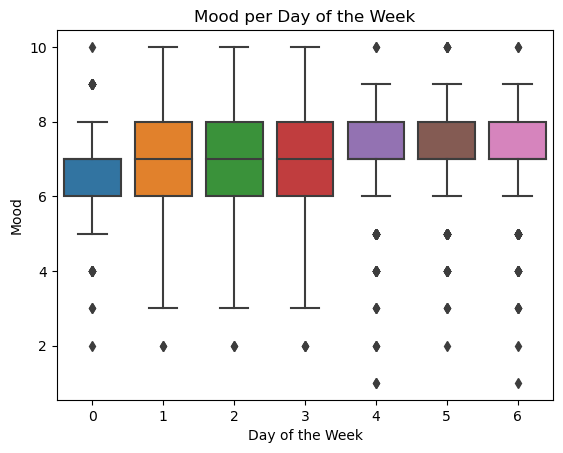

In [267]:
# horizontal boxplot the mood for every day of the week (0 = monday, 6 = sunday) and label the x axis with the day of the week
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.dayofweek, y='value')
plt.title('Mood per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mood')
plt.savefig('plots/mood_dayofweek.png')

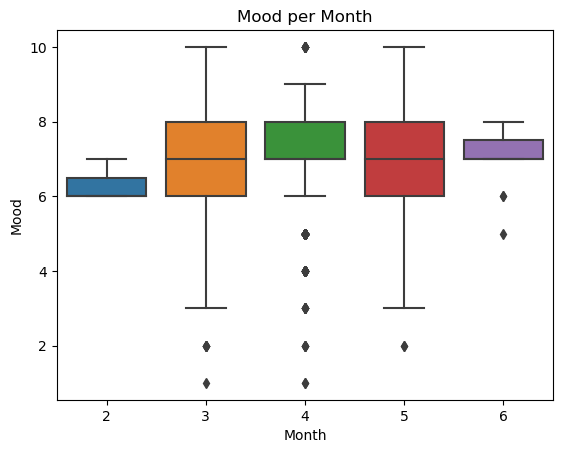

In [268]:
# mood per month
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.month, y='value')
plt.title('Mood per Month')
plt.xlabel('Month')
plt.ylabel('Mood')
plt.savefig('plots/mood_month.png')

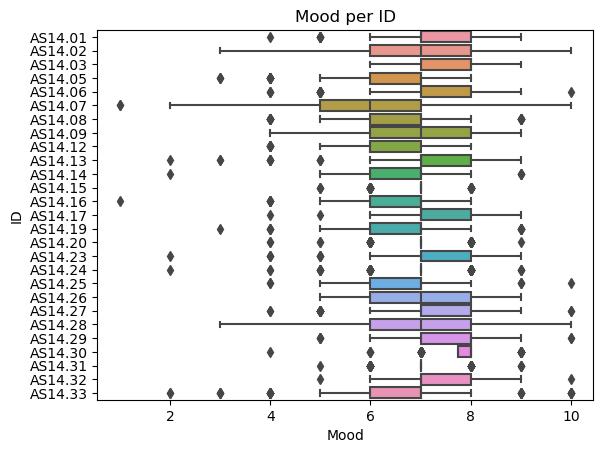

In [269]:
# horizontal boxplot of mood per id
sns.boxplot(data=data[data.variable == 'mood'], x='value', y='id')
plt.title('Mood per ID')
plt.xlabel('Mood')
plt.ylabel('ID')
plt.savefig('plots/mood_id.png')

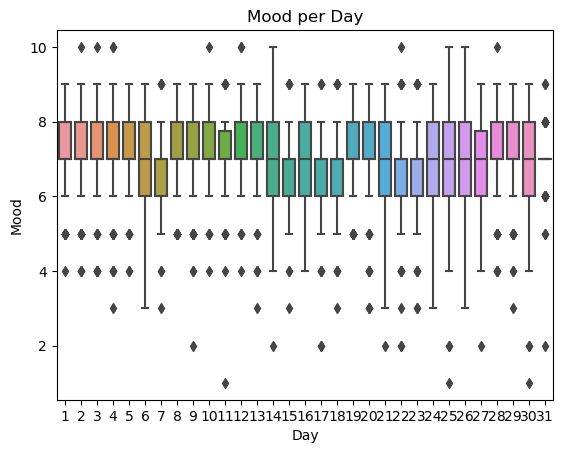

In [270]:
# mood per day
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.day, y='value')
plt.title('Mood per Day')
plt.xlabel('Day')
plt.ylabel('Mood')
plt.savefig('plots/mood_day.png')

### Task 1B: Data cleaning

Remove incorrect values:

In [271]:
# transform the data to wide format
data_wide = data.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()
# convert the time column to datetime
data_wide['time'] = pd.to_datetime(data_wide['time'])
# normalize all variable values between 0 and 1
data_wide = (data_wide - data_wide.min()) / (data_wide.max() - data_wide.min())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Extract hour and day information from the 'time' column
data_wide['hour'] = data_wide['time'].dt.hour
data_wide['day'] = data_wide['time'].dt.dayofweek
data_wide

In [ ]:
data_wide.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
activity,22965.0,0.115958,0.186946,0.000,0.00000,0.021739,0.158333,1.000
appCat.builtin,91288.0,18.538262,415.989243,-82798.871,2.02000,4.038000,9.922000,33960.246
appCat.communication,74276.0,43.343792,128.912750,0.006,5.21800,16.225500,45.475750,9830.777
appCat.entertainment,27125.0,37.576480,262.960476,-0.011,1.33400,3.391000,14.922000,32148.677
appCat.finance,939.0,21.755251,39.218361,0.131,4.07200,8.026000,20.155000,355.513
appCat.game,813.0,128.391615,327.145246,1.003,14.14800,43.168000,123.625000,5491.793
appCat.office,5642.0,22.578892,449.601382,0.003,2.00400,3.106000,8.043750,32708.818
appCat.other,7650.0,25.810839,112.781355,0.014,7.01900,10.028000,16.829250,3892.038
appCat.social,19145.0,72.401906,261.551846,0.094,9.03000,28.466000,75.372000,30000.906


In [ ]:
data_wide

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,hour,day
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12,0
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,18,0
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9,1
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,14,2
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,4


In [ ]:
# replace the missing values with 0
data_wide = data_wide.fillna(0)

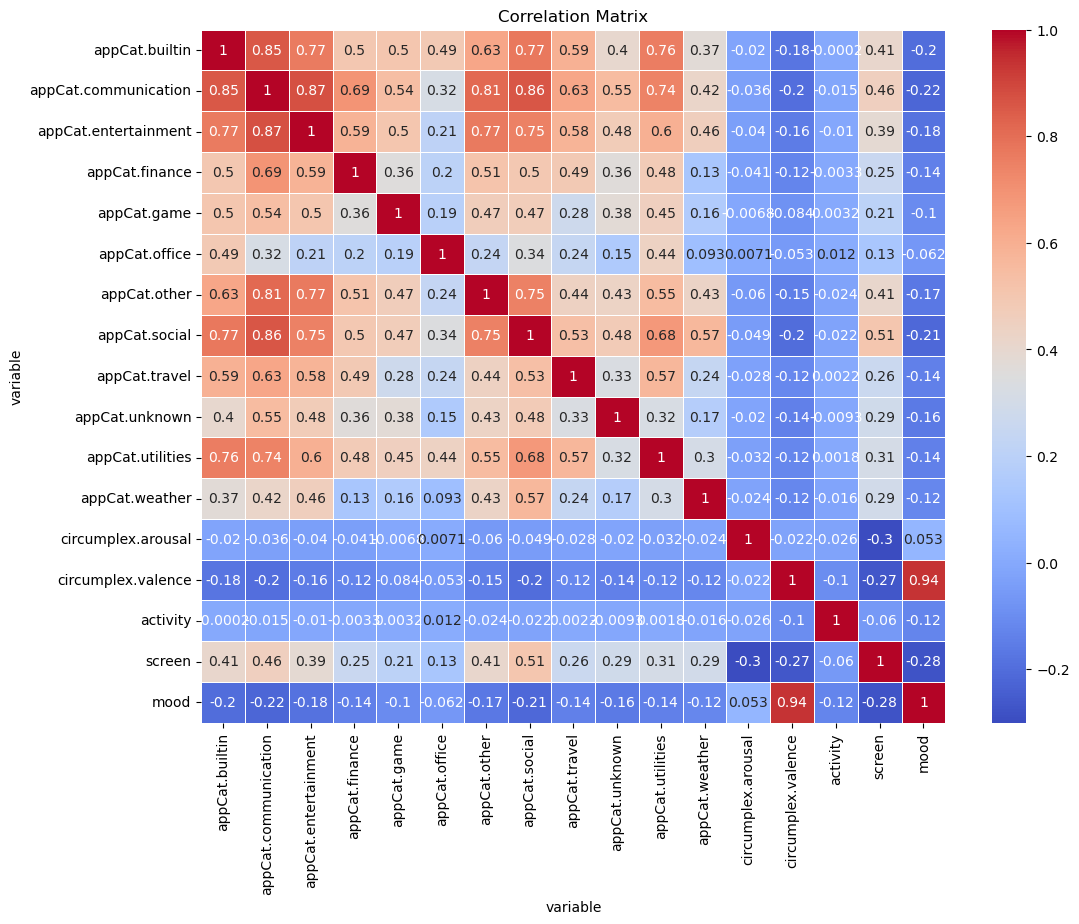

In [ ]:
corr = data_wide.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# remove rows where appCat.builtin and appCat.entertainment	are negative
data_wide = data_wide[(data_wide['appCat.builtin'] >= 0) & (data_wide['appCat.entertainment'] >= 0)]
data_wide

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,hour,day
0,AS14.01,2014-02-17 12:04:42.394,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,0
1,AS14.01,2014-02-17 18:28:25.520,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18,0
2,AS14.01,2014-02-18 09:29:51.257,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,1
3,AS14.01,2014-02-19 14:43:30.575,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14,2
4,AS14.01,2014-02-19 17:29:10.378,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,6.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,4
358922,AS14.33,2014-05-30 22:32:11.049,0.0,3.122,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,4
358923,AS14.33,2014-05-30 22:32:14.240,0.0,1.003,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,4
358924,AS14.33,2014-05-30 22:32:15.246,0.0,4.134,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,4


In [ ]:
# sum variables
sum_vars = ['appCat.builtin', 'appCat.communication', 'appCat.entertainment', 
                 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 
                 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 
                 'appCat.weather']
# mean variables
mean_vars = ['circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'mood']

# group the wide data by day and id and aggregate the sum and mean of the variables
grouped_wide = data_wide.groupby(pd.Grouper(key='time', freq='D')).agg({**{var: 'sum' for var in sum_vars}, **{var: 'mean' for var in mean_vars}})
grouped_wide

KeyError: 'The grouper name time is not found'

In [ ]:
from itertools import cycle

palette = sns.color_palette("husl", n_colors=len(data_wide.id.unique()))
color_cycle = cycle(palette)

for i in data_wide.id.unique():
    current_color = next(color_cycle)
    plt.figure(figsize=(12, 6)) 
    sns.lineplot(
        data=data_wide[data_wide.id == i], 
        x='time', 
        y='mood', 
        color=current_color, 
        marker='o',  # Show data points as dots
        linestyle='--'  # Make the lines dashed
    )
    plt.title(i)
    plt.savefig('plots/timeseries/' + i + '.png')
    plt.clf()

AttributeError: 'DataFrame' object has no attribute 'id'

In [ ]:
# for every variable, plot the distribution
for var in data_wide.columns:
    if var not in ['id', 'time']:
        sns.histplot(data_wide, x=var, kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        # save plot
        plt.savefig('plots/' + var + '.png')
        plt.clf()

<Figure size 640x480 with 0 Axes>

## TASK 1C: FEATURE ENGINEERING

## Modelling

In [ ]:
# select random id as data
df_prophet = data_wide[data_wide.id == 'AS14.01']

# Prepare the data
data_wide['time'] = pd.to_datetime(data_wide['time'])
df_prophet = df_prophet.rename(columns={'time': 'ds', 'mood': 'y'})

# Initialize the model
model = Prophet()

# Fit the model on the dataset
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=10)  # predict the next 'periods' days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

ValueError: Dataframe has less than 2 non-NaN rows.